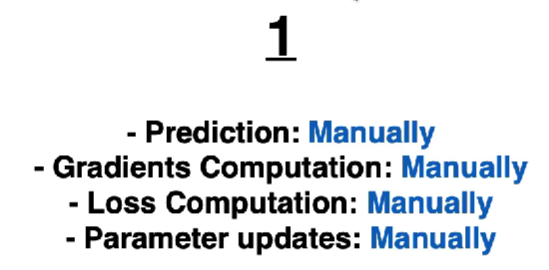

In [100]:
import numpy as np

#### We're working with linear regression, so there is a function involved that will be some kinda combination of weights and our inputs.

### f = w * x

Ignoring bias at the moment...

Lets say ...

### f = 2 * x

#### So our weight must be 2.......must be as in after the iterations the weight should be or close to 2 ....

##### Training samples...

In [101]:
# Feature 
X = np.array([1,2,3,4], dtype = np.float32)

In [102]:
# Label
Y = np.array([2,4,6,8], dtype = np.float32)

# Note that we have used 2 as our proposed weight for the function in this example, hence the corresponding 2x values in y...

In [103]:
# Initializing weight with 0...
w = 0.0

### Model Prediction

In [104]:
# Forward pass...
def forward(x):
    return w * x

forward(X)

array([0., 0., 0., 0.], dtype=float32)

### Loss

MSE

In [105]:
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

### Gradient

### MSE = 1/N * (w*x - y) *** 2

Derivative of this function (Objective function)  with respect to the weight...

### dj / dw = 1/N * 2x * (w*x - y)

In [106]:
def gradient(x, y, y_predicted):
    return (np.dot(2*x, y_predicted - y) / x.size)

In [107]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


### Training

In [108]:
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # Loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # Update weights...........negative direction of the gradient....
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'{epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
        

1: w = 0.300, loss = 30.00000000
2: w = 0.555, loss = 21.67499924
3: w = 0.772, loss = 15.66018677
4: w = 0.956, loss = 11.31448555
5: w = 1.113, loss = 8.17471600
6: w = 1.246, loss = 5.90623236
7: w = 1.359, loss = 4.26725292
8: w = 1.455, loss = 3.08308983
9: w = 1.537, loss = 2.22753215
10: w = 1.606, loss = 1.60939264


In [109]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 8.031


---

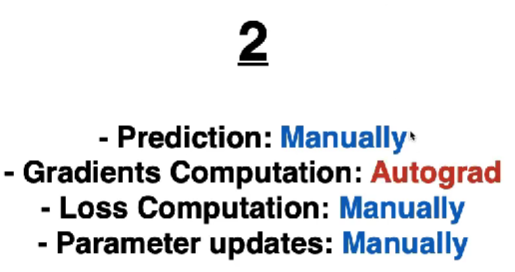

In [110]:
import torch 

##### Training samples...

In [111]:
# Feature 
X = torch.tensor([1,2,3,4], dtype = torch.float32)

In [112]:
# Label
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
# Note that we have used 2 as our proposed weight for the function in this example, hence the corresponding 2x values in y...

In [113]:
# Initializing weight with 0...
w = torch.tensor(0.0, dtype=torch.float32,  requires_grad = True)
print(w)

tensor(0., requires_grad=True)


### Model Prediction

In [114]:
# Forward pass...
def forward(x):
    return w * x

### Loss

MSE

In [115]:
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

In [116]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


### Training

In [117]:
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # Loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward()  # Will calculate gradient of the loss with respect to w .....dl/dw
    
    # Update weights..........also this operation should not be part of the computational graph, hence the .no_grad() method...
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # we must zero the gradients beacause it gets accumulated ... check out 03-Gradient_calculation_with_Autograd.ipynb....talking about calculation of the gradient...which is different everytime....and so, should not be accumulated...
    w.grad.zero_()
    
    if epoch % 1 == 0:
        print(f'{epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
        

1: w = 0.300, loss = 30.00000000
2: w = 0.555, loss = 21.67499924
3: w = 0.772, loss = 15.66018772
4: w = 0.956, loss = 11.31448650
5: w = 1.113, loss = 8.17471695
6: w = 1.246, loss = 5.90623236
7: w = 1.359, loss = 4.26725292
8: w = 1.455, loss = 3.08308983
9: w = 1.537, loss = 2.22753215
10: w = 1.606, loss = 1.60939169


In [118]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 8.031


---

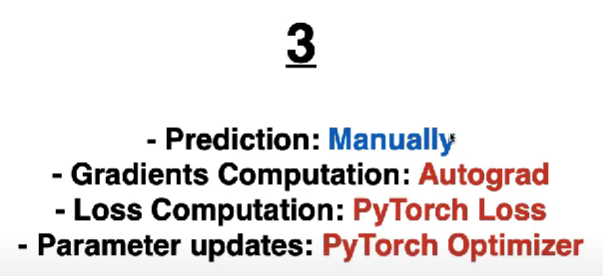

### General training pipeline in pytorch:
1) Design model (input, output size, forward pass )

2) Construct loss and optimizer

3) Training loop:

    - Forward pass: Compute prediction
    
    - Backward pass: Gradients
    
    - Update weights

### The module torch. nn contains different classess that help you build neural network models.

In [1]:
import torch
import torch.nn as nn 

##### Training samples...

In [2]:
# Feature 
X = torch.tensor([1,2,3,4], dtype = torch.float32)

In [3]:
# Label
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
# Note that we have used 2 as our proposed weight for the function in this example, hence the corresponding 2x values in y...

In [4]:
# Initializing weight with 0...
w = torch.tensor(0.0, dtype=torch.float32,  requires_grad = True)
print(w)

tensor(0., requires_grad=True)


### Model Prediction

In [5]:
# Forward pass...
def forward(x):
    return w * x

In [6]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


### Training

In [7]:
learning_rate = 0.01
n_iters = 10


# Loss
loss = nn.MSELoss() # Takes in actual y and predicted y

# Optimizer
optimizer = torch.optim.SGD([w], lr= learning_rate)


for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # Loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward()  # Will calculate gradient of the loss with respect to w .....dl/dw
    
    # This will make an optimization step...
    optimizer.step()
    
    # we must zero the gradients beacause it gets accumulated ... check out 03-Gradient_calculation_with_Autograd.ipynb....talking about calculation of the gradient...which is different everytime....and so, should not be accumulated...
    optimizer.zero_grad()
    
    if epoch % 1 == 0:
        print(f'{epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
        

1: w = 0.300, loss = 30.00000000
2: w = 0.555, loss = 21.67499924
3: w = 0.772, loss = 15.66018772
4: w = 0.956, loss = 11.31448650
5: w = 1.113, loss = 8.17471695
6: w = 1.246, loss = 5.90623236
7: w = 1.359, loss = 4.26725292
8: w = 1.455, loss = 3.08308983
9: w = 1.537, loss = 2.22753215
10: w = 1.606, loss = 1.60939169


In [ ]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

---

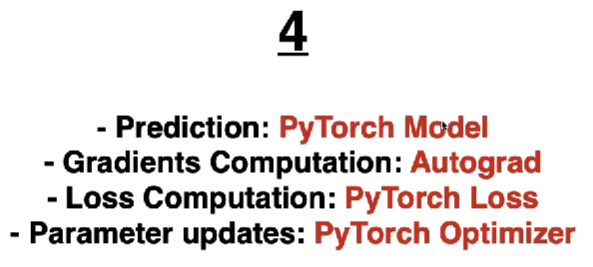

In [1]:
import torch
import torch.nn as nn

##### Training samples

In [2]:
# Features
# We need a 2d array this time, where the number rows is the number of samples, 
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)

In [3]:
# Label
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)
# Note that we have used 2 as our proposed weight for the function in this example, hence the corresponding 2x values in y...

In [4]:
# setting number of samples and features...
n_samples, n_features = X.shape

print(n_samples, n_features)


# So we have 4 samples and 1 feature for each sample...

4 1


In [5]:
# Setting input and output size...
input_size = n_features
output_size = n_features

### Model Prediction

In [6]:
model = nn.Linear(input_size, output_size)

In [7]:
# We're gonna be using the model this time, so we cannot use a float value directly...we'll have to make a test tensor...

X_test = torch.tensor([5], dtype = torch.float32)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# the .item() method will return the actual float value as opposed to a tensor value...

Prediction before training: f(5) = 0.534


### Training

In [8]:
learning_rate = 0.01
n_iters = 10


# Loss
loss = nn.MSELoss() # Takes in actual y and predicted y

# Optimizer..........also modify the optimizer this time.....
optimizer = torch.optim.SGD( model.parameters(), lr= learning_rate)


for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # Loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward()  # Will calculate gradient of the loss with respect to w .....dl/dw
    
    # This will make an optimization step...
    optimizer.step()
    
    # we must zero the gradients beacause it gets accumulated ... check out 03-Gradient_calculation_with_Autograd.ipynb....talking about calculation of the gradient...which is different everytime....and so, should not be accumulated...
    optimizer.zero_grad()
    
    if epoch % 1 == 0:
        [w, b] = model.parameters()  # unpacking values...
        print(f'{epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
        

1: w = 0.204, loss = 23.87288284
2: w = 0.426, loss = 16.66205406
3: w = 0.612, loss = 11.65803337
4: w = 0.767, loss = 8.18527031
5: w = 0.896, loss = 5.77502060
6: w = 1.004, loss = 4.10202789
7: w = 1.094, loss = 2.94060683
8: w = 1.169, loss = 2.13415742
9: w = 1.232, loss = 1.57401860
10: w = 1.285, loss = 1.18479359


In [9]:
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction after training: f(5) = 7.688


---

### Making a custom model...

In [10]:
# Making a custom model...
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    
    def forward(self, x):
        return self.lin(x)
    
    
model = LinearRegression(input_size, output_size)

In [11]:
learning_rate = 0.01
n_iters = 10


# Loss
loss = nn.MSELoss() # Takes in actual y and predicted y

# Optimizer..........also modify the optimizer this time.....
optimizer = torch.optim.SGD( model.parameters(), lr= learning_rate)


for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # Loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward()  # Will calculate gradient of the loss with respect to w .....dl/dw
    
    # This will make an optimization step...
    optimizer.step()
    
    # we must zero the gradients beacause it gets accumulated ... check out 03-Gradient_calculation_with_Autograd.ipynb....talking about calculation of the gradient...which is different everytime....and so, should not be accumulated...
    optimizer.zero_grad()
    
    if epoch % 1 == 0:
        [w, b] = model.parameters()  # unpacking values...
        print(f'{epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
        

1: w = 0.799, loss = 10.16960621
2: w = 0.944, loss = 7.10624123
3: w = 1.065, loss = 4.98033905
4: w = 1.166, loss = 3.50492477
5: w = 1.251, loss = 2.48087215
6: w = 1.321, loss = 1.77001023
7: w = 1.380, loss = 1.27646899
8: w = 1.429, loss = 0.93372148
9: w = 1.470, loss = 0.69561034
10: w = 1.504, loss = 0.53010368


In [12]:
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction after training: f(5) = 8.432


---